In [55]:
# import the strategy file

#import moving_average_main as strategy
#import sys
#sys.path.append( '/home/mgoel/Documents/quant_algos/Broker_simulation/')
#from broker import main

In [56]:
#strategy code
mean1 = 0
mean2 = 0
num1 = 0
initial = 1 #sum1>sum2
close_series = []

def strategy(close, n1=20, n2=5):
    global mean1, mean2, num1, initial, close_series
    if(num1<n1):
        close_series.append(close)
        num1+=1
    else:
        close_series.pop(0)
        close_series.append(close)
        mean1 = sum(close_series)/n1
        mean2 = sum(close_series[-n2:])/n2

    if(initial==0 and mean1<=mean2):
        initial=1
        return "buy"
    elif(initial==1 and mean1>=mean2):
        initial=0
        return "sell"

In [81]:
# broker code

#the broker code

#strategy.main(close) returns "buy" or "sell"

import os
#import test_strategy as strategy
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#import dateparse
import tailer
import io

#buy variables
no_of_buys = int(0)
total_buy = int(0)

#sell variables
no_of_sells = int(0)
total_sells = int(0)

strategy_return = "none"
pnl = []
net_profit = []

def main(ticker_symbol,no_of_ticks = 20,max_investment = 5000, brokerage = 0, allow_short = False,n1=20, n2=5):

    # max_investment = 5000
    #brokerage = 30
    #allow_short = False
    #ticker_symbol = "ADANIENT.NS"
    path = '/home/mgoel/Documents/quant_algos/Broker_simulation/Data/'+ticker_symbol+'.csv'
    #no_of_ticks = 20

    if(os.path.exists(path.strip())==False):
        print("Data file does not exist")
        print(path)
        exit()

    with open(path) as file:
        last_lines = tailer.tail(file, no_of_ticks)

    #dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
    #data = pd.read_csv(io.StringIO('\n'.join(last_lines)), header=None, index_col=0, parse_dates=[0], date_parser=dateparse)
    data = pd.read_csv(io.StringIO('\n'.join(last_lines)), header=None, index_col=0)

    #buy order
    def buy_order(price):
        global no_of_buys
        global total_buy
        if(total_buy-total_sells>max_investment):
            return
        no_of_buys+=1
        total_buy+=price

    
    #buy order
    def sell_order(price):
        global no_of_sells, total_sells
        if(total_sells-total_buy>max_investment):
            return
        if(allow_short==False and no_of_sells>=no_of_buys):
            return
        no_of_sells+=1
        total_sells+=price - brokerage
    
    for n in range(no_of_ticks):
        close = float(data.iloc[n][4])
        strategy_return = strategy(close, n1=n1, n2=n2)
        if(strategy_return=="buy"):
            buy_order(close)
        elif(strategy_return=="sell"):
            sell_order(close)
        pnl.append(total_sells-total_buy)
        net_profit.append(total_sells-total_buy + ((no_of_buys - no_of_sells )*(close)) )

    y_axis_1 = pd.Series(pnl, index = data.index)
    y_axis_2 = pd.Series(net_profit, index = data.index)
    plt.plot(y_axis_1,color='blue', label="Booked profits")
    plt.plot(y_axis_2, color='green', label = "Net profits")
    print("Current_holdings = ",no_of_buys - no_of_sells )
    print("Net profit = ", net_profit[-1])
    print("Number of buys = ", no_of_buys)
    print("Number of sells = ", no_of_sells)
    print("Profit by holding ", no_of_buys-no_of_sells, "shares = ", (no_of_buys-no_of_sells)*(data.iloc[-1][4] - data.iloc[0][4]))
    plt.legend(loc='upper left', fontsize=8)
    plt.show()


Current_holdings =  1
Net profit =  -234.75036799999953
Number of buys =  9
Number of sells =  8
Profit by holding  1 shares =  322.15002400000003


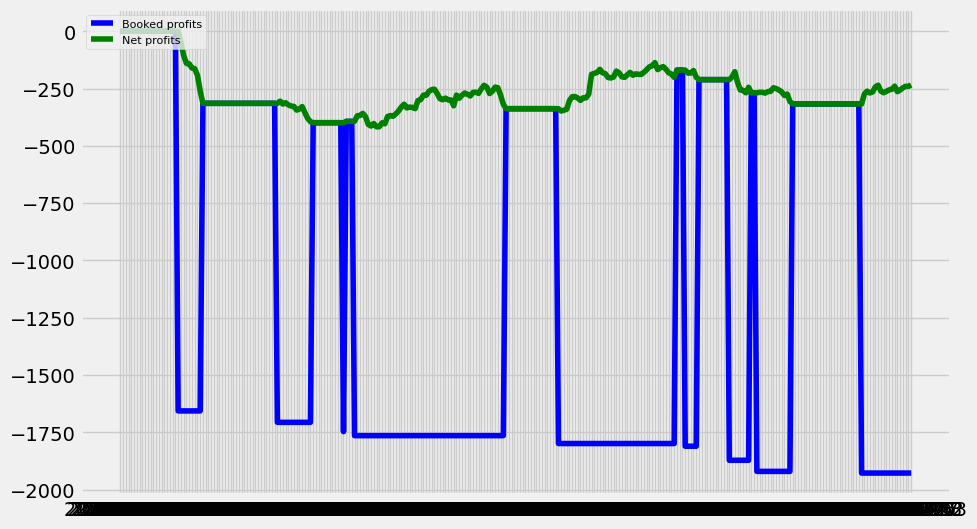

In [82]:
# simulation

main('HDFCBANK.NS',no_of_ticks=288, n1=28, n2=5)